# calculating the bispectrum for periodic box

In [1]:
import os, time
import numpy as np 
from simbig import halos as Halos
from simbig import galaxies as Galaxies
from simbig import forwardmodel as FM

In [2]:
from simbig import obs as CosmoObs

In [3]:
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

## Read in `Quijote` halo catalog and populate with galaxies
I'm using `i=1118`th cosmology in the LHC because that's the closest to the cosmology used in Manera+(2015)

In [4]:
# read in halo catalog
halos = Halos.Quijote_LHC_HR(1118, z=0.5)
print('Om, Ob, h, ns, s8:')
print(Halos.Quijote_LHC_cosmo(1118))

# get LOWZ HOD parameters
theta_hod = Galaxies.thetahod_lowz_sgc()
# populate halos
hod = Galaxies.hodGalaxies(halos, theta_hod, seed=0)

Om, Ob, h, ns, s8:
(0.2671, 0.03993, 0.6845, 0.96030000000000004, 0.78549999999999998)


## Calculate bispectrum using `simbig.obs.B0k_box`

In [5]:
t0 = time.time()
b123 = CosmoObs.B0k_box(hod, Ngrid=360,Lbox=1000, silent=False)
print('B0 take %f sec' % ((time.time() - t0)))

------------------
344006 positions in 1000 box
sum w_i = 344006.000000
nbar = 0.000344
--- calculating the FFT ---
344006 positions, Ntot=344006
positions assigned to grid
position grid FFTed
fcomb complete
--- calculating the bispectrum ---
--- calculating delta(k) shells ---
--- summing over k1,k2,k3 configurations ---
--- correcting for shotnoise ---
B0 take 664.563632 sec


In [6]:
klim = (b123[0] < 0.5) & (b123[1] < 0.5) & (b123[2] < 0.5)

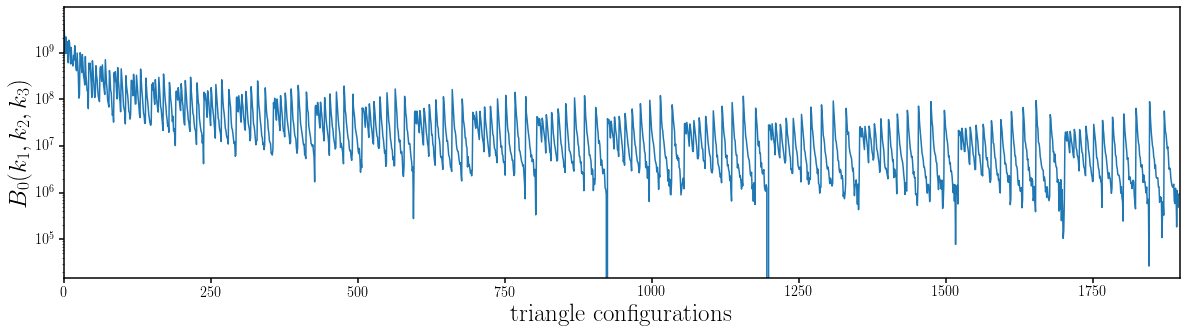

In [7]:
fig = plt.figure(figsize=(20,5))
sub = fig.add_subplot(111)
sub.plot(range(np.sum(klim)), b123[3][klim])
sub.set_xlabel('triangle configurations', fontsize=25)
sub.set_xlim(0, np.sum(klim))
sub.set_ylabel('$B_0(k_1, k_2, k_3)$', fontsize=25)
sub.set_yscale('log')